In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [10]:
# Load the dataset
CC_df = pd.read_csv(r"C:\Users\chamo\Desktop\credit\creditcard.csv")
print(CC_df.head(10))
print(CC_df.shape)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [11]:
# Dataset exploration
print(CC_df.columns)
print(CC_df['Class'].value_counts())
print(CC_df.info())
print(CC_df.isnull().sum())
print(CC_df.describe())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Class
0    284315
1       492
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float6

In [12]:

# Separate legitimate and fraudulent transactions
legit = CC_df[CC_df["Class"] == 0]
fraud = CC_df[CC_df["Class"] == 1]


In [13]:
# Balancing the data
legit_sample = legit.sample(n=492)
cc_df2 = pd.concat([legit_sample, fraud], axis=0)
print(cc_df2['Class'].value_counts())
print(cc_df2.groupby('Class').mean())

Class
0    492
1    492
Name: count, dtype: int64
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94508.473577  0.067999  0.069876  0.030163 -0.002351  0.054808   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.046351 -0.026790  0.069303 -0.020016  ... -0.035735 -0.019501   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.009901  0.023727 -0.024064 -0.015427  0.012294  0.005773 -0.006276   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0  

In [14]:
# Splitting features and labels
X = cc_df2.drop(columns={'Class'})
Y = cc_df2['Class']
print(X.head())
print(f"Shape of X Data frame: {X.shape}")
print(f"Shape of Y Data frame: {Y.shape}")

            Time        V1        V2        V3        V4        V5        V6  \
279524  168926.0  1.961343 -0.715029 -1.703147 -0.613582  1.713865  3.913136   
178940  123851.0  1.948309  0.509531 -1.314830  3.640726  0.760668 -0.074404   
174784  122068.0 -0.055797  1.036757 -1.041280 -0.247666  0.429944 -0.837475   
239342  150059.0 -2.084089  2.006896 -0.476583 -1.116190 -0.104131 -0.919429   
158974  112043.0 -0.995355 -1.352590 -1.734069 -0.268498  2.236780 -0.050637   

              V7        V8        V9  ...       V20       V21       V22  \
279524 -1.252671  1.054911  1.314417  ... -0.143399  0.191787  0.691780   
178940  0.373592 -0.051184 -1.144656  ... -0.392522  0.271425  0.791236   
174784  0.623342  0.297727 -0.405182  ... -0.170220  0.385114  0.991021   
239342  0.674635  0.273956  1.235175  ...  0.643120 -0.007696  0.719735   
158974  2.318880 -0.381945 -0.362560  ...  0.818068  0.535621  0.865505   

             V23       V24       V25       V26       V27       V28  

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [16]:

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Logistic Regression Confusion Matrix:
 [[96  3]
 [ 5 93]]
Logistic Regression Accuracy: 0.9593908629441624


In [18]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

KNN Confusion Matrix:
 [[97  2]
 [ 8 90]]
KNN Accuracy: 0.949238578680203


In [19]:
# Error Rate vs. K Value for KNN
error_rate = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

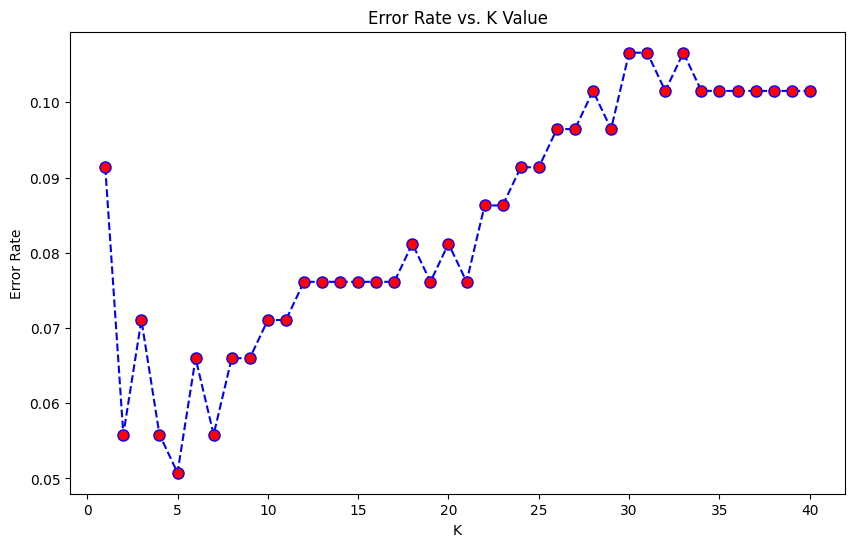

In [20]:
# Plotting the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [21]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

SVM Confusion Matrix:
 [[96  3]
 [ 5 93]]
SVM Accuracy: 0.9593908629441624


In [22]:

# ROC Curve for SVM
y_score_svm = svm.decision_function(X_test)  # Use decision_function for SVM
fpr, tpr, _ = roc_curve(y_test, y_score_svm)
roc_auc = auc(fpr, tpr)


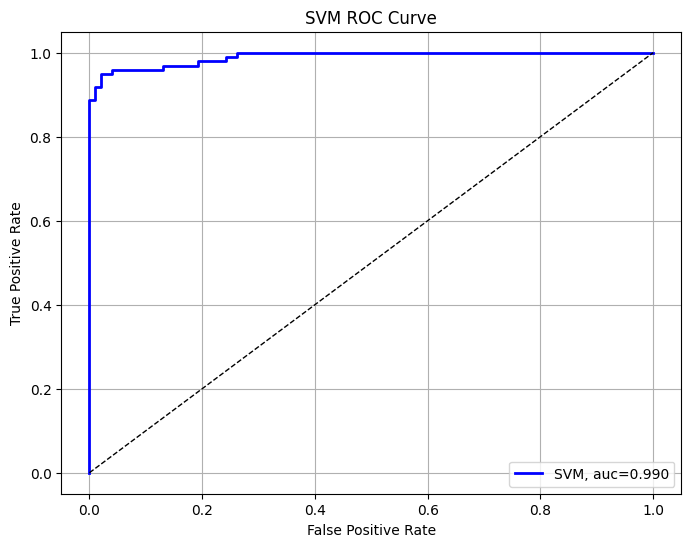

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"SVM, auc={roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

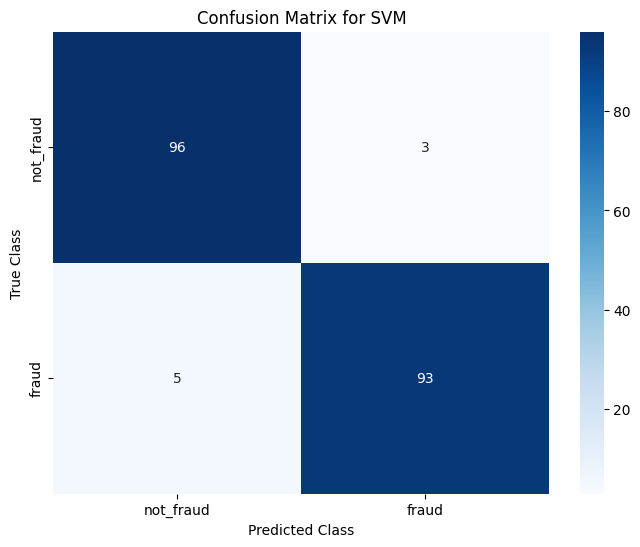

In [24]:
# Confusion Matrix Visualization for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['not_fraud', 'fraud'], yticklabels=['not_fraud', 'fraud'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for SVM')
plt.show()

In [25]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        99
           1       0.85      0.95      0.90        98

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197

Decision Tree Confusion Matrix:
 [[83 16]
 [ 5 93]]
Decision Tree Accuracy: 0.8934010152284264


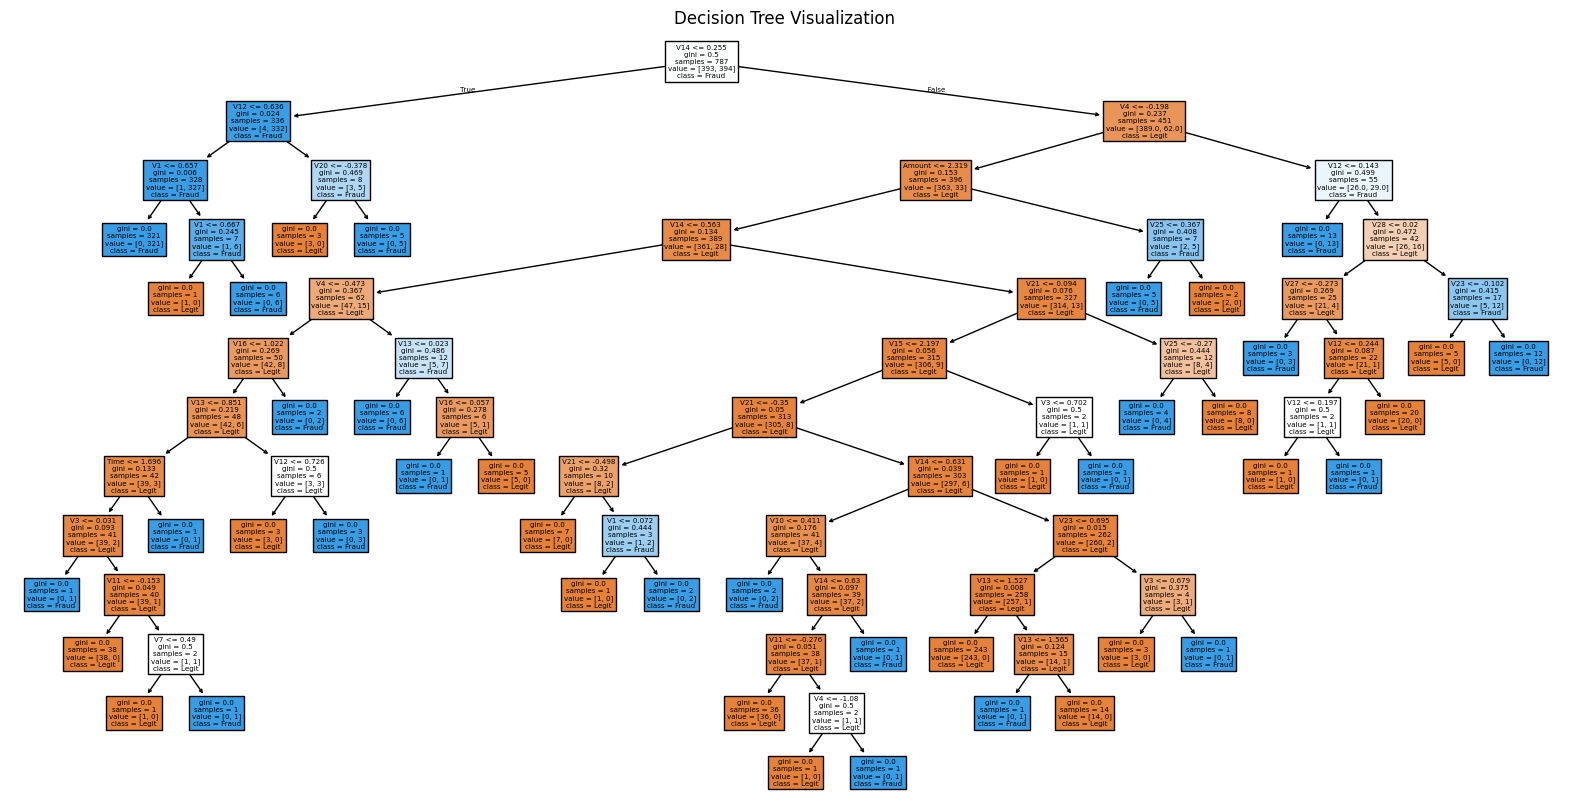

In [26]:
# Visualization for Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Legit', 'Fraud'])
plt.title('Decision Tree Visualization')
plt.show()

In [27]:
# Summary: Include comparisons
print("Logistic Regression, KNN, SVM, and Decision Tree results are displayed.")

Logistic Regression, KNN, SVM, and Decision Tree results are displayed.
